# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

Football is the most loved game on the planet.Let us see what we can get out of this dataset.This kernel is a work in process.If you like my work please do vote

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/imagetemp/79997093_10157649073933818_3165564680118730752_o.jpg
/kaggle/input/fifa19/data.csv


**Importing the Python Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')

**Importing the data**

In [3]:
df=pd.read_csv('../input/fifa19/data.csv')

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

**Summary of Dataset**

In [6]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 18207
Columns  : 89

Features :
     : ['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 

**Finding out which columns are catogerical**

In [7]:
df.select_dtypes(exclude=['int','float']).columns

Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

**Displaying the values in the catogerical columns **

In [8]:
print(df['Position'].unique())
print(df['Photo'].unique())
print(df['Release Clause'].unique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB' nan]
['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
['€226.5M' '€127.1M' '€228.1M' ... '€74K' '€101K' '€147K']


There are 89 columns in the dataset

In [9]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [10]:
#df.fillna(main_df.mean(),inplace=True)

**Data Cleaning**

In [11]:
# filling the missing value for the continous variables for proper data visualization

df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [12]:
df.dropna()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18207.0,1.112924,0.393554,1.0,1.0,1.0,1.0,5.0
Weak Foot,18207.0,2.947438,0.659591,1.0,3.0,3.0,3.0,5.0
Skill Moves,18207.0,2.360356,0.755394,1.0,2.0,2.0,3.0,5.0
Jersey Number,18207.0,19.508046,15.935210,1.0,8.0,17.0,26.0,99.0


We can see tha minimum age of player is 16 and maximum is 45 and mean is 25.12

Jersey number starts with 1 and ends with 99 

**Dropping unwanted columns**

In [14]:
df=df.drop(columns='Unnamed: 0')

In [15]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


**Histograms**

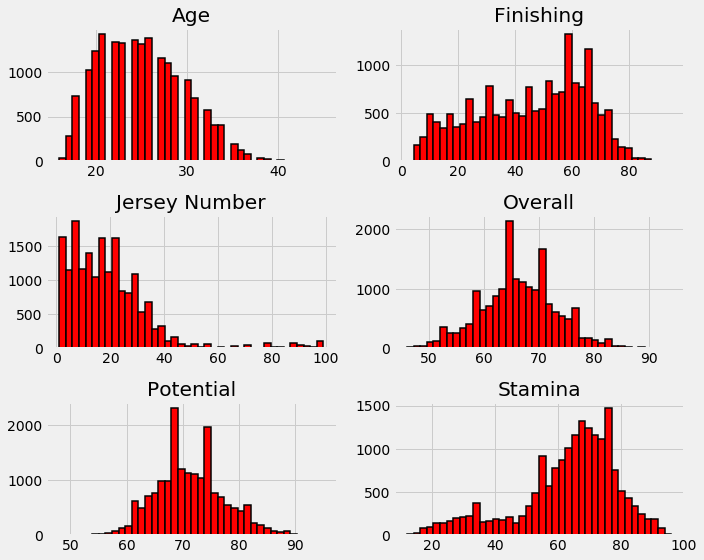

In [16]:
df[['Age','Overall','Potential','Jersey Number','Finishing','Stamina']].hist(figsize=(10,8),bins=40,color='r',linewidth='1.5',edgecolor='k')
plt.tight_layout()
plt.show()

Age of the player is from 18 to 40.

Most of the Jersey Numbers are less than Number 40


**Lets Study Nationality of Players**

In [17]:
#df.groupby('Nationality').mean()

In [18]:
#df['Nationality'].value_counts()

In [19]:
len(df.Nationality.unique())

164

In [20]:
df['Nationality'].value_counts()[:10]

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

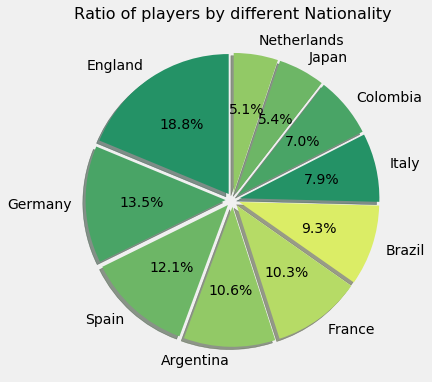

In [21]:
# Data to plot
England = len(df[df['Nationality'] == 'England'])
Germany = len(df[df['Nationality'] == 'Germany'])
Spain = len(df[df['Nationality'] == 'Spain'])
Argentina = len(df[df['Nationality'] == 'Argentina'])
France = len(df[df['Nationality'] == 'France'])
Brazil = len(df[df['Nationality'] == 'Brazil'])
Italy = len(df[df['Nationality'] == 'Italy'])
Colombia = len(df[df['Nationality'] == 'Colombia'])
Japan = len(df[df['Nationality'] == 'Japan'])
Netherlands = len(df[df['Nationality'] == 'Netherlands'])

labels = 'England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands'
sizes = [England,Germany,Spain,Argentina,France,Brazil,Italy,Colombia,Japan,Netherlands]
plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("summer"),
autopct='%1.1f%%', shadow=True, startangle=90)
sns.set_context("paper", font_scale=1.2)
plt.title('Ratio of players by different Nationality', fontsize=16)
plt.show()


There are player of 164 nationalities in the dataset.England has more player as the football Infrastructure and English Premier League are contributing towards developing good Quality Players.

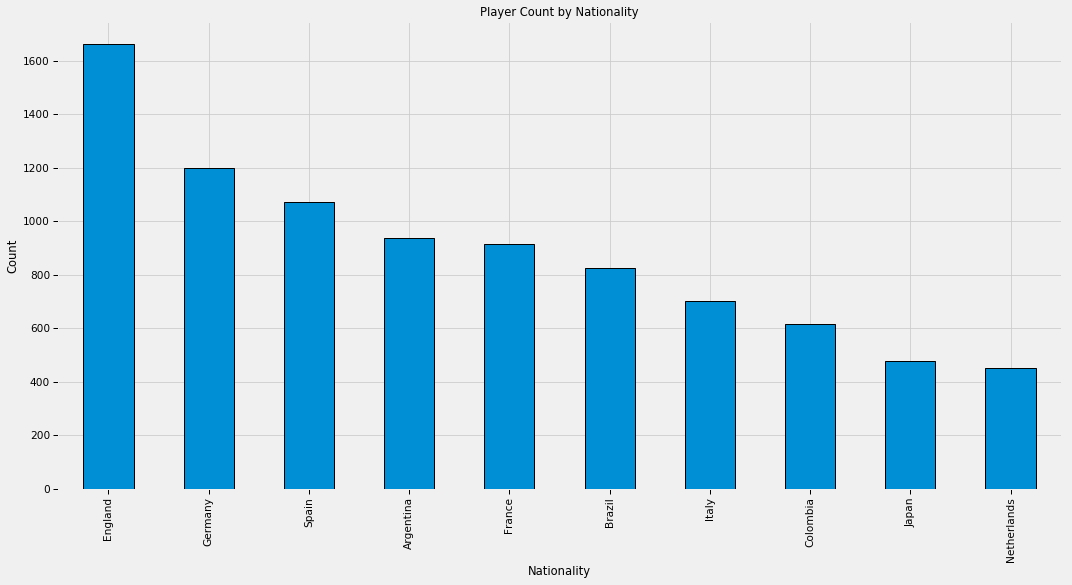

In [22]:
df.groupby(["Nationality"])["ID"].count().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1,figsize=(16,8))
plt.title('Player Count by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.ioff()

Text(0, 0.5, 'Count')

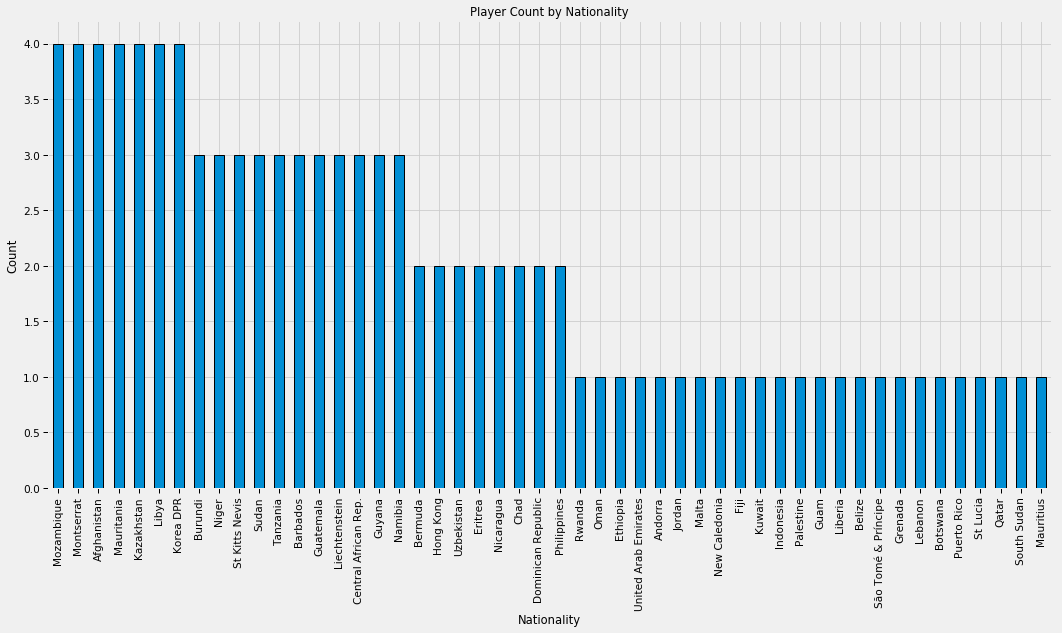

In [23]:
df.groupby(["Nationality"])["ID"].count().sort_values(ascending=False).tail(50).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1,figsize=(16,8))
plt.title('Player Count by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')

So we have more players from England.More player come from Europe followed by South America and then Asia.We see that countries from Africa have less number of player.This is because football needs good training which is availabe mostly in Europe.

#### Age Distribution of Players

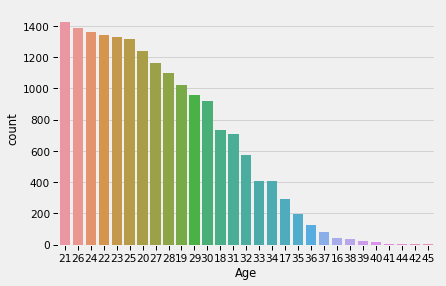

In [24]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
#df['Age'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#ax[0].set_title('Share of Sources')
#ax[0].set_ylabel('Count')
sns.countplot('Age',data=df,order=df['Age'].value_counts().index)
#ax[1].set_title('Count of Age')
plt.show()

More players are in the Twenties.As Football requires high Stamina the numbers of player in the Thirties is low compared to ones in their Twenties.

**Age and their Nationality**

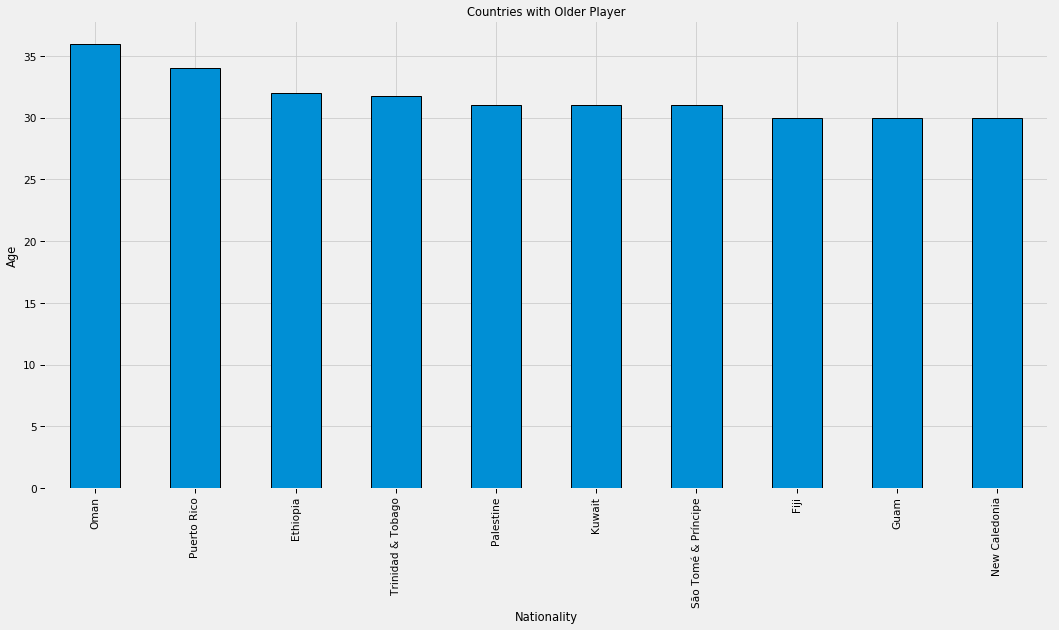

In [25]:
df.groupby(["Nationality"])["Age"].mean().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1,figsize=(16,8))
plt.title('Countries with Older Player')
plt.xlabel('Nationality')
plt.ylabel('Age')
plt.ioff()

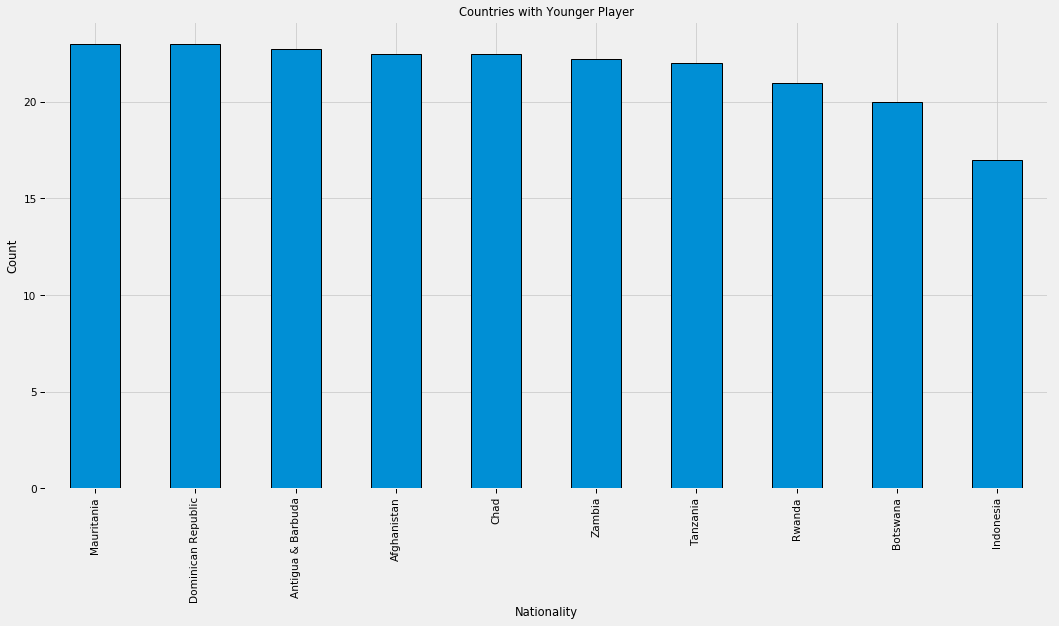

In [26]:
df.groupby(["Nationality"])["Age"].mean().sort_values(ascending=False).tail(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1,figsize=(16,8))
plt.title('Countries with Younger Player')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.ioff()

**Correlation Plot**

In [27]:
df1=df.copy().drop(columns=['ID'])

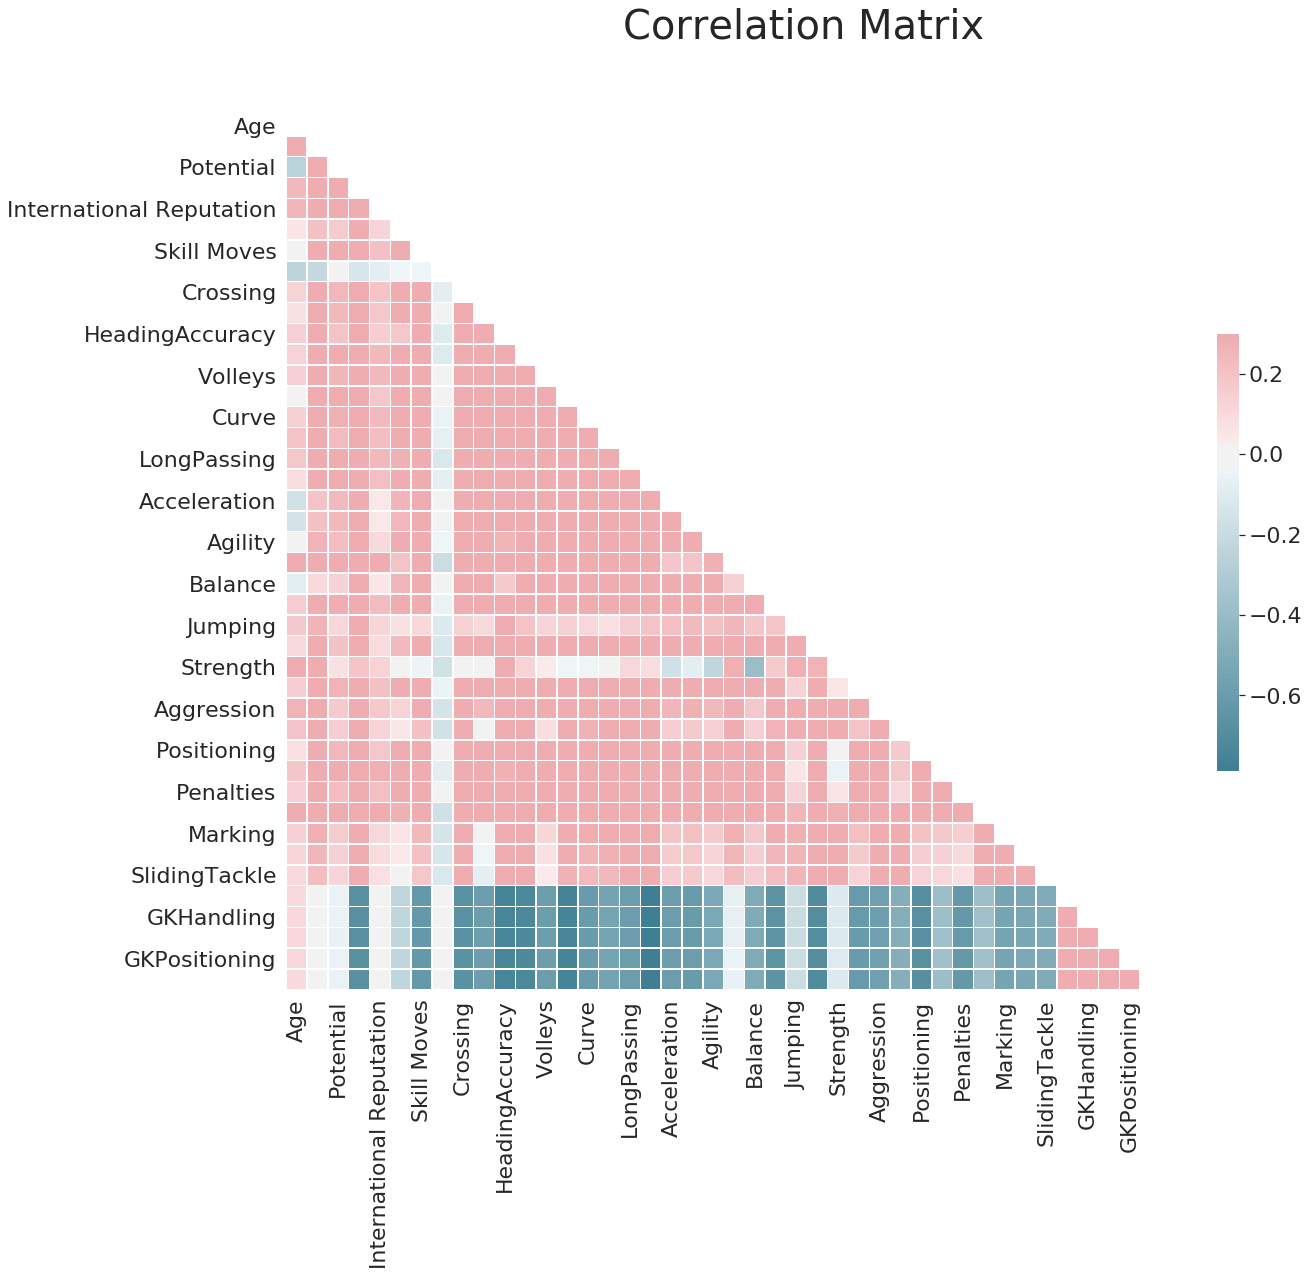

In [28]:
#Set up plot style
sns.set(style='white',font_scale=2)

#Compute Correlation Matrix
corr=df1.corr()

#Generate mask for upper traingle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#Set up the matplotlib figure
f,ax=plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix",fontsize=40)

#Generate a custom diverging Colormap 
cmap=sns.diverging_palette(220,10,as_cmap=True)

#Draw the heat map with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=0.5,cbar_kws={'shrink':.5})
plt.ioff()


**Indian Players**

In [29]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [30]:
df[df['Nationality']== 'India']

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8605,190939,S. Chhetri,33,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67,67,No Club,https://cdn.sofifa.org/flags/159.png,...,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0,NaN
10011,223763,S. Jhingan,24,https://cdn.sofifa.org/players/4/19/223763.png,India,https://cdn.sofifa.org/flags/159.png,65,71,No Club,https://cdn.sofifa.org/flags/159.png,...,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0,NaN
12598,217225,J. Lalpekhlua,27,https://cdn.sofifa.org/players/4/19/217225.png,India,https://cdn.sofifa.org/flags/159.png,63,64,No Club,https://cdn.sofifa.org/flags/159.png,...,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0,NaN
12811,225213,G. Singh Sandhu,26,https://cdn.sofifa.org/players/4/19/225213.png,India,https://cdn.sofifa.org/flags/159.png,63,68,No Club,https://cdn.sofifa.org/flags/159.png,...,57.0,19.0,15.0,11.0,63.0,59.0,59.0,62.0,64.0,NaN
13508,238205,A. Edathodika,31,https://cdn.sofifa.org/players/4/19/238205.png,India,https://cdn.sofifa.org/flags/159.png,62,62,No Club,https://cdn.sofifa.org/flags/159.png,...,49.0,67.0,62.0,68.0,14.0,15.0,14.0,11.0,7.0,NaN
14054,231461,P. Halder,25,https://cdn.sofifa.org/players/4/19/231461.png,India,https://cdn.sofifa.org/flags/159.png,61,67,No Club,https://cdn.sofifa.org/flags/159.png,...,57.0,60.0,57.0,56.0,6.0,8.0,14.0,7.0,6.0,NaN
14199,228188,P. Kotal,24,https://cdn.sofifa.org/players/4/19/228188.png,India,https://cdn.sofifa.org/flags/159.png,61,66,No Club,https://cdn.sofifa.org/flags/159.png,...,55.0,63.0,58.0,60.0,10.0,7.0,11.0,12.0,8.0,NaN
14218,208485,L. Ralte,25,https://cdn.sofifa.org/players/4/19/208485.png,India,https://cdn.sofifa.org/flags/159.png,61,62,No Club,https://cdn.sofifa.org/flags/159.png,...,54.0,36.0,29.0,27.0,9.0,13.0,8.0,9.0,8.0,NaN
14705,223764,N. Das,24,https://cdn.sofifa.org/players/4/19/223764.png,India,https://cdn.sofifa.org/flags/159.png,60,65,No Club,https://cdn.sofifa.org/flags/159.png,...,57.0,62.0,67.0,60.0,14.0,9.0,12.0,10.0,11.0,NaN
14786,233524,U. Singh,22,https://cdn.sofifa.org/players/4/19/233524.png,India,https://cdn.sofifa.org/flags/159.png,60,67,No Club,https://cdn.sofifa.org/flags/159.png,...,56.0,24.0,32.0,31.0,11.0,8.0,5.0,12.0,7.0,NaN


In [31]:
def country(x):
    return df[df['Nationality'] == x][['Name','Overall','Potential','Position']]


# let's check the Indian Players 
country('India')

,Name,Overall,Potential,Position
8605,S. Chhetri,67,67,LS
10011,S. Jhingan,65,71,RCB
12598,J. Lalpekhlua,63,64,RS
12811,G. Singh Sandhu,63,68,GK
13508,A. Edathodika,62,62,LCB
14054,P. Halder,61,67,RCM
14199,P. Kotal,61,66,RB
14218,L. Ralte,61,62,LW
14705,N. Das,60,65,LB
14786,U. Singh,60,67,RM


Sunil Chhetri (born 3 August 1984) is an Indian professional footballer who plays as a striker or winger and captains both the Indian Super League side Bengaluru and the Indian national team. Popularly known as Captain Fantastic, having scored the second highest number of goals in international matches among active male players after Cristiano Ronaldo,he is both the most-capped player and all-time top goalscorer for the Indian national team, with 72 goals in 115 appearances.

**Football Club data**

In [32]:
#print(df['Club'].unique())

In [33]:
def club(x):
    return df[df['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('FC Barcelona')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
0,L. Messi,10.0,RF,94,Argentina,31,€565K,€110.5M,2021
7,L. Suárez,9.0,RS,91,Uruguay,31,€455K,€80M,2021
18,M. ter Stegen,22.0,GK,89,Germany,26,€240K,€58M,2022
20,Sergio Busquets,5.0,CDM,89,Spain,29,€315K,€51.5M,2023
32,Coutinho,7.0,LW,88,Brazil,26,€340K,€69.5M,2023
42,S. Umtiti,23.0,CB,87,France,24,€205K,€57M,2023
49,Jordi Alba,18.0,LB,87,Spain,29,€250K,€38M,2020
53,I. Rakitić,4.0,RCM,87,Croatia,30,€260K,€46.5M,2021
54,Piqué,3.0,RCB,87,Spain,31,€240K,€34M,2022
96,A. Vidal,8.0,CAM,85,Chile,31,€205K,€26M,2021


**Age Vs Performace**

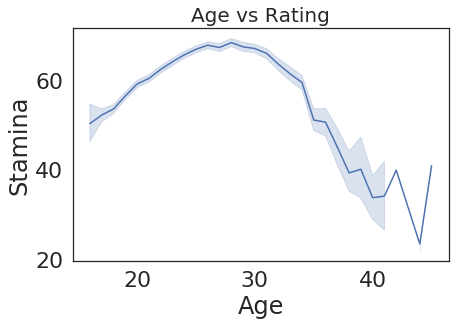

In [34]:
sns.lineplot(df['Age'], df['Stamina'], palette = 'dark')
plt.title('Age vs Rating', fontsize = 20)

plt.show()

We can see that the Stamina of a player peaks in the age group 25-27.

**Top 10 Right Hand Footballers**

In [35]:
df[df['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


**Which Foot?**

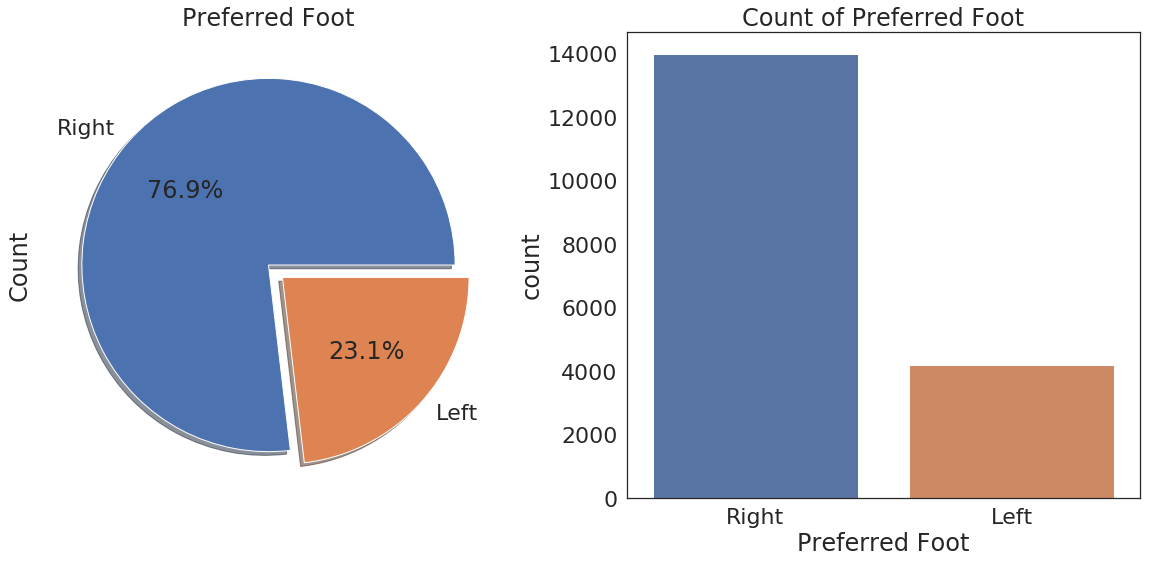

In [36]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Preferred Foot'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Preferred Foot')
ax[0].set_ylabel('Count')
sns.countplot('Preferred Foot',data=df,ax=ax[1],order=df['Preferred Foot'].value_counts().index)
ax[1].set_title('Count of Preferred Foot')
plt.show()

**Top 10 Left Hand Footballers**

In [37]:
df[df['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


**Skill Sets of Players in Different Position**

In [38]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

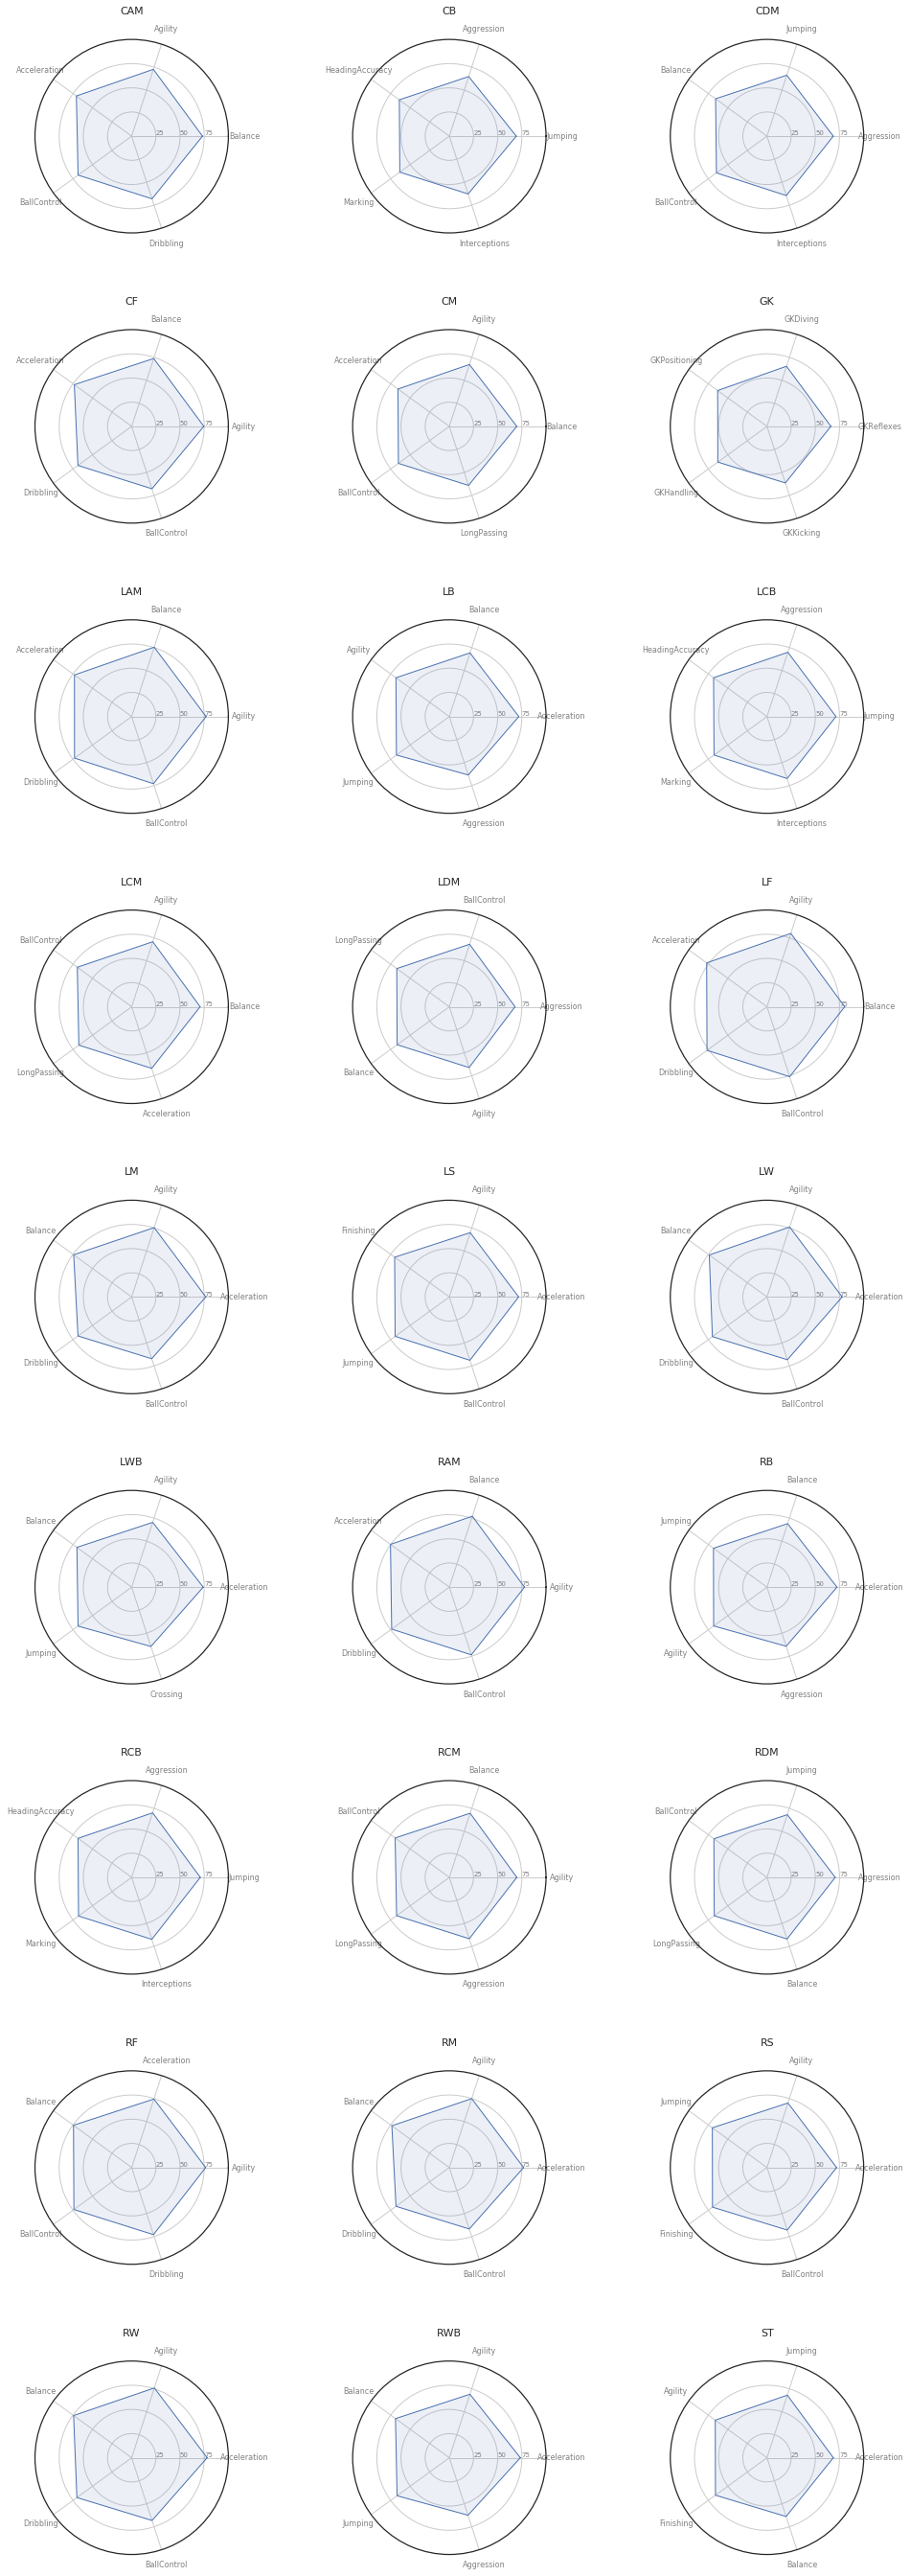

In [39]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)
        # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 